<a href="https://www.kaggle.com/code/averma111/pytorch-ps3e15?scriptVersionId=129828756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
%%capture 
!pip install optuna

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
from tqdm.notebook import tqdm
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
warnings.filterwarnings('ignore')
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

In [26]:
def get_dataframe(path):
    df=pd.read_csv(path)
    return df.set_index(df.iloc[:,0])

In [27]:
data = get_dataframe('/kaggle/input/playground-series-s3e15/data.csv')
original = get_dataframe('/kaggle/input/predicting-heat-flux/Data_CHF_Zhao_2020_ATE.csv')

In [28]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['duplicate'] = df.duplicated().sum()
    return summ

In [29]:
summary('data',data)

data shape: (31644, 10)


,dtypes,null,unique,min,median,max,mean,std,duplicate
id,int64,0,31644,0.0000,15821.5000,31643.000,15821.500000,9134.980296,0
author,object,5024,10,NaN,NaN,NaN,NaN,NaN,0
geometry,object,5500,3,NaN,NaN,NaN,NaN,NaN,0
pressure [MPa],float64,4452,144,0.1000,11.0700,20.680,10.640747,4.333683,0
mass_flux [kg/m2-s],float64,4791,733,0.0000,2731.0000,7975.000,3068.011023,1777.032080,0
x_e_out [-],float64,10415,1682,-0.8667,0.0038,0.232,-0.000453,0.100911,0
D_e [mm],float64,5488,43,1.0000,7.8000,37.500,8.629255,5.185692,0
D_h [mm],float64,4589,49,1.0000,10.0000,120.000,14.174330,19.838489,0
length [mm],float64,4759,70,10.0000,610.0000,3048.000,832.987391,672.299239,0
chf_exp [MW/m2],float64,0,109,0.8000,3.4000,19.300,3.796985,1.983991,0


In [30]:
summary('original',original)

original shape: (1865, 10)


,dtypes,null,unique,min,median,max,mean,std,duplicate
id,int64,0,1865,1,933.0000,1865,933.000000,538.523444,0
author,object,0,10,Beus,NaN,Williams,NaN,NaN,0
geometry,object,0,3,annulus,NaN,tube,NaN,NaN,0
pressure [MPa],float64,0,114,0.1,10.3400,20.68,10.010949,4.282715,0
mass_flux [kg/m2-s],int64,0,578,0,2590.0000,7975,2862.647721,1656.412247,0
x_e_out [-],float64,0,1360,-0.8667,0.0244,0.232,0.016179,0.117575,0
D_e [mm],float64,0,36,1.0,8.5000,37.5,9.417212,6.333807,0
D_h [mm],float64,0,41,1.0,10.3000,120.0,16.167721,21.182870,0
length [mm],int64,0,54,10,625.0000,3048,911.340483,726.718974,0
chf_exp [MW/m2],float64,0,109,0.8,3.5000,19.3,3.854638,1.985535,0


<AxesSubplot: xlabel='x_e_out [-]', ylabel='Count'>

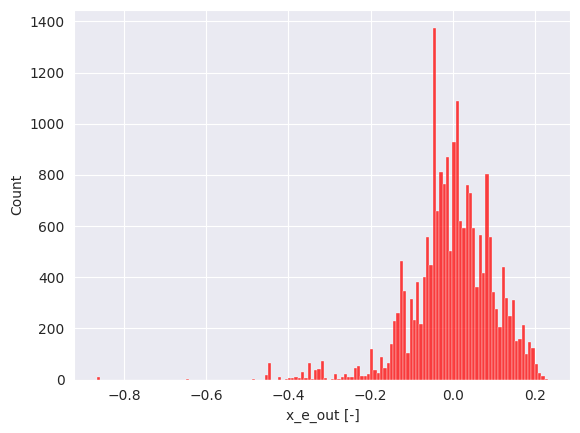

In [35]:
sns.histplot(data,x='x_e_out [-]',color='r')

<AxesSubplot: xlabel='x_e_out [-]', ylabel='Count'>

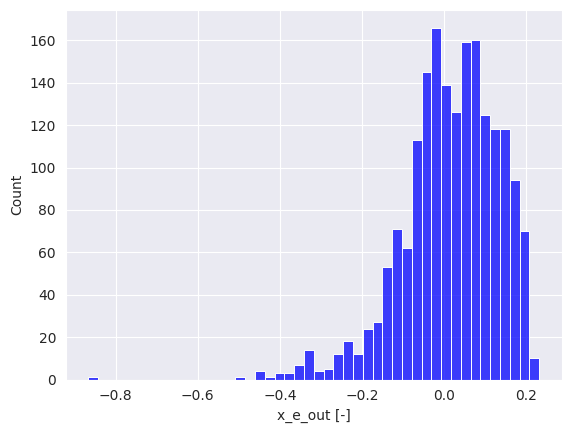

In [37]:
sns.histplot(original,x='x_e_out [-]',color='b')